In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('recent-grads.csv')
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
stem = df.loc[df['Major_category'].isin(['Engineering', 'Computers & Mathematics', 'Health', 'Physical Sciences'])]
eng = df.loc[df['Major_category'] == 'Engineering']
cs = df.loc[df['Major_category'] == 'Computers & Mathematics']
health = df.loc[df['Major_category'] == 'Health']
science = df.loc[df['Major_category'].isin(['Physical Sciences', 'Biology & Life Science'])]

In [4]:
medians = pd.DataFrame({'Engineering': eng['Median'], 
                       'CS and Math': cs['Median'],
                       'Health': health['Median'],
                       'Science': science['Median']})

<Figure size 1152x648 with 0 Axes>

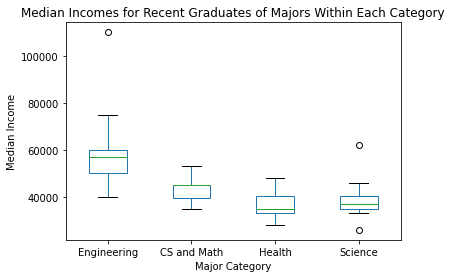

In [5]:
plt.figure(figsize=(16,9))
ax = medians.plot.box()
ax.set_title('Median Incomes for Recent Graduates of Majors Within Each Category')
ax.set_xlabel('Major Category')
ax.set_ylabel('Median Income')
plt.show()

In [6]:
eng_emp = eng[['Major', 'Full_time', 'Part_time', 'Unemployed']]
eng_emp = eng_emp.sort_values(by='Full_time')
eng_emp = eng_emp.reset_index()
eng_emp.index = eng_emp['Major']
eng_emp = eng_emp[['Full_time', 'Part_time', 'Unemployed']]

Text(0.5, 0, 'Graduates')

<Figure size 648x1152 with 0 Axes>

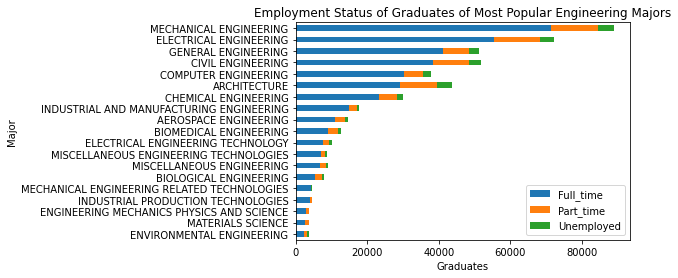

In [7]:
plt.figure(figsize=(9,16))
ax = eng_emp[10:].plot.barh(stacked=True)
ax.set_title('Employment Status of Graduates of Most Popular Engineering Majors')
ax.set_xlabel('Graduates')

In [8]:
cs_emp = cs[['Major', 'Full_time', 'Part_time', 'Unemployed']]
cs_emp = cs_emp.sort_values(by='Full_time')
cs_emp = cs_emp.reset_index()
cs_emp.index = cs_emp['Major']
cs_emp = cs_emp[['Full_time', 'Part_time', 'Unemployed']]

Text(0.5, 0, 'Graduates')

<Figure size 648x1152 with 0 Axes>

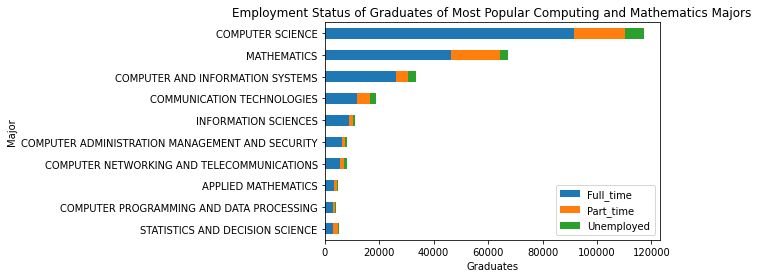

In [9]:
plt.figure(figsize=(9,16))
ax = cs_emp[1:].plot.barh(stacked=True)
ax.set_title('Employment Status of Graduates of Most Popular Computing and Mathematics Majors')
ax.set_xlabel('Graduates')

In [10]:
health_emp = health[['Major', 'Full_time', 'Part_time', 'Unemployed']]
health_emp = health_emp.sort_values(by='Full_time')
health_emp = health_emp.reset_index()
health_emp.index = health_emp['Major']
health_emp = health_emp[['Full_time', 'Part_time', 'Unemployed']]

Text(0.5, 0, 'Graduates')

<Figure size 648x1152 with 0 Axes>

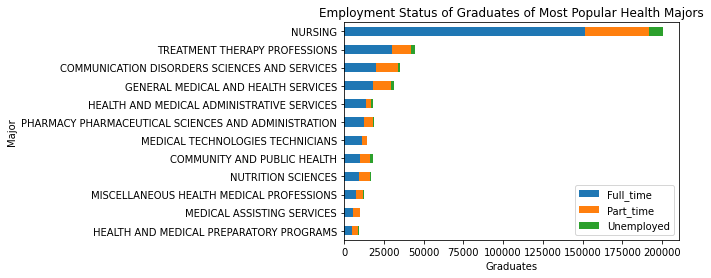

In [11]:
plt.figure(figsize=(9,16))
ax = health_emp.plot.barh(stacked=True)
ax.set_title('Employment Status of Graduates of Most Popular Health Majors')
ax.set_xlabel('Graduates')

In [12]:
science_emp = science[['Major', 'Full_time', 'Part_time', 'Unemployed']]
science_emp = science_emp.sort_values(by='Full_time')
science_emp = science_emp.reset_index()
science_emp.index = science_emp['Major']
science_emp = science_emp[['Full_time', 'Part_time', 'Unemployed']]

<Figure size 648x1152 with 0 Axes>

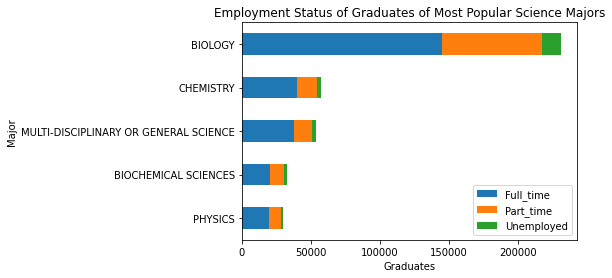

In [13]:
plt.figure(figsize=(9,16))
ax = science_emp[-5:].plot.barh(stacked=True)
ax.set_title('Employment Status of Graduates of Most Popular Science Majors')
ax.set_xlabel('Graduates')
ax.legend(loc = 'lower right')

<Figure size 648x1152 with 0 Axes>

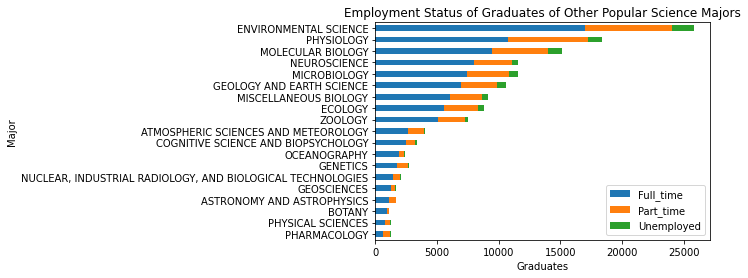

In [14]:
plt.figure(figsize=(9,16))
ax = science_emp[:-5].plot.barh(stacked=True)
ax.set_title('Employment Status of Graduates of Other Popular Science Majors')
ax.set_xlabel('Graduates')
ax.legend(loc = 'lower right')

Text(0.5, 1.0, 'Computing and Mathematics - Percent of Graduates that are Female')

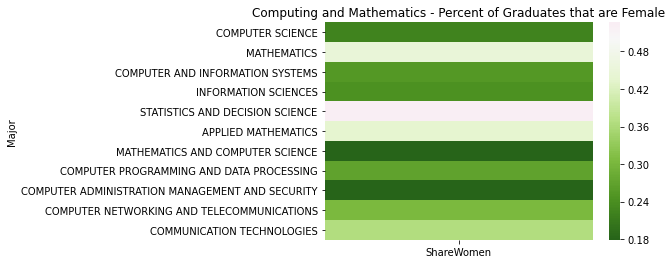

In [15]:
sharewomencs = cs[['ShareWomen', 'Major']]
sharewomencs.index = cs['Major']
ax = sns.heatmap(data = sharewomencs[['ShareWomen']], cmap='PiYG_r', center = 0.5)
ax.set_title('Computing and Mathematics - Percent of Graduates that are Female')

Text(0.5, 1.0, 'Computing and Mathematics - Percent of Graduates that are Female')

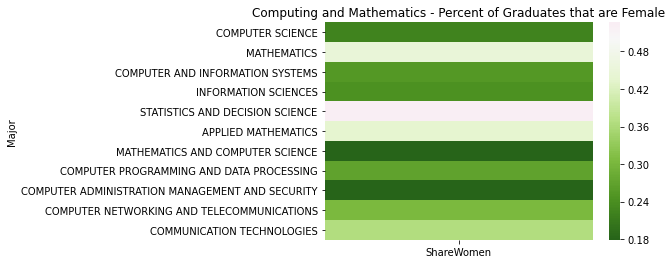

In [16]:
sharewomencs = cs[['ShareWomen', 'Major']]
sharewomencs.index = cs['Major']
ax = sns.heatmap(data = sharewomencs[['ShareWomen']], cmap='PiYG_r', center = 0.5)
ax.set_title('Computing and Mathematics - Percent of Graduates that are Female')

Text(0.5, 1.0, 'Health - Percent of Graduates that are Female')

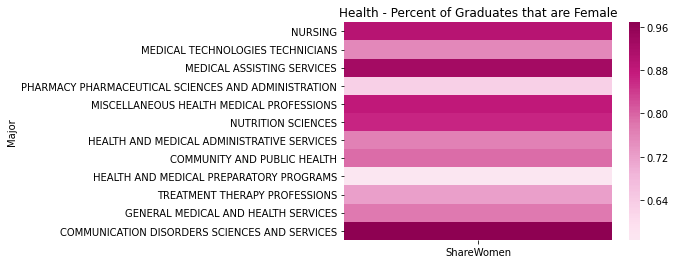

In [17]:
sharewomenhealth = health[['ShareWomen', 'Major']]
sharewomenhealth.index = health['Major']
ax = sns.heatmap(data = sharewomenhealth[['ShareWomen']], cmap='PiYG_r', center = 0.5)
ax.set_title('Health - Percent of Graduates that are Female')

Text(0.5, 1.0, 'Science - Percent of Graduates that are Female')

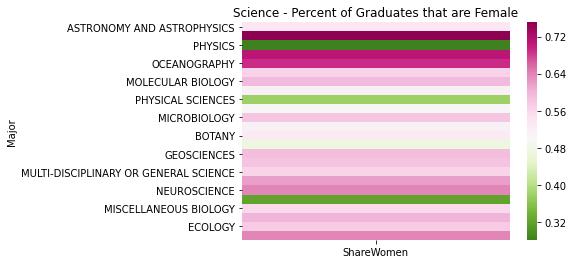

In [18]:
sharewomenscience = science[['ShareWomen', 'Major']]
sharewomenscience.index = science['Major']
ax = sns.heatmap(data = sharewomenscience[['ShareWomen']], cmap='PiYG_r', center = 0.5)
ax.set_title('Science - Percent of Graduates that are Female')

<AxesSubplot:xlabel='Total', ylabel='Median'>

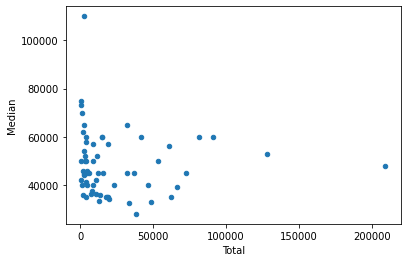

In [19]:
stem.plot.scatter('Total', 'Median')#, c='ShareWomen', colormap='viridis')